In [22]:
from PIL import Image
import numpy as np
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
from scipy import misc
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import h5py
from numpy import genfromtxt

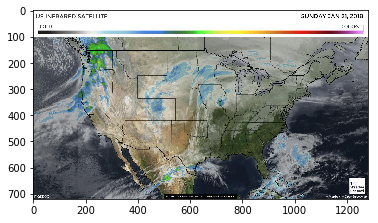

In [23]:
im = imageio.imread("/home/morgan/ussat_1280x720.jpg?v=ap")
plt.imshow(im)
plt.show()

In [24]:
imageio.imwrite('/home/morgan/ussat_1280x720.png', im) # First we need to create the PNG file

In [25]:
im = misc.imread("/home/morgan/ussat_1280x720.png")
type(im)

numpy.ndarray

In [12]:
im.shape 
1280 / 4

320.0

In [26]:
image = scipy.misc.imresize(im, size=(180,320))
image.shape

(180, 320, 3)

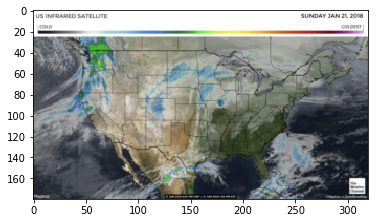

In [27]:
img = Image.fromarray(image)
plt.imshow(img)
plt.show()

In [28]:
p = np.reshape(img, (180*320*3, 1)) 
nx = p.shape[0]
p.shape

(172800, 1)

In [386]:
# Initialize your variable as an empty list first
x = []
x.append([p,1])

In [45]:
# X = genfromtxt('/home/morgan/python_code/train_examp_matrix.csv', delimiter=',')
X = np.array(genfromtxt('/home/morgan/python_code/train_examp_matrix.csv', delimiter=','), dtype=np.float128)
# X = np.concatenate((X, x[0][0]), axis=1)
m = X.shape[1]
X.shape

(750000, 5)

In [10]:
Y = genfromtxt('/home/morgan/python_code/yvalue_array.csv', delimiter=',')
#Y = np.concatenate((Y, np.array(([[1]]))), axis=1)
Y = np.reshape(Y, (Y.shape[0], 1))
Y.shape

(5, 1)

In [394]:
np.savetxt("train_examp_matrix.csv", X, delimiter=",")
np.savetxt("yvalue_array.csv", Y, delimiter=",")

In [400]:
W1 = np.random.randn( nx, 1 ) * 0.01
b = np.zeros( ( 1, 1 ) )
print(W1,b)

[[ 0.01585217]
 [-0.01568833]
 [ 0.01444471]
 ..., 
 [ 0.00964968]
 [ 0.00150468]
 [ 0.00272815]] [[ 0.]]


In [401]:
Z = np.dot(W1.T,X) + b
print(Z)

[[-797.12057 -381.15853  60.601351  349.51143  1116.6366]]


In [337]:
Z.shape

(1, 4)

In [345]:
A = 1.0 / (1.0 + np.exp(-1.0 * Z))
print(A)

[[ 1.0  1.0  4.6755737e-42  1.570273e-162]]


In [346]:
dZ = A - Y
print(dZ)

[[ 0.0  0.0  4.6755737e-42  1.570273e-162]]


In [347]:
dZ.shape

(1, 4)

In [315]:
dW1 = 1 / m * np.dot(X, dZ.T) 

In [316]:
db = 1 / m * np.sum(dZ)

In [317]:
learning_rate = 0.0075 

In [318]:
W1 = W1 - learning_rate * dW1

In [319]:
b = b - learning_rate * db

In [46]:
u = 1 / X.shape[1] *  np.sum(X, axis=1)
u = np.reshape(u, (u.shape[0], 1))
X = X - u
var = 1 / X.shape[1] * np.sum(X**2, axis=1)
var = np.reshape(var, (var.shape[0], 1))
var.shape

(750000, 1)

In [49]:
X = X / var

In [396]:
p = np.array(p, dtype=np.float128)
X = np.array(X, dtype=np.float128)